In [1]:
#! /usr/bin/env python3
from conpan.conpan import ConPan

In [2]:
# Parameters
kind = 'debian'
image = 'redmine:3.2.2'
image = 'google/mysql'
dir_data = '/home/neglectos/Desktop/ConPan/data/debian/'

In [3]:
cp = ConPan(packages=kind, image=image, dir_data=dir_data) 

In [4]:
cp.download()

In [6]:
(general_info, installed_packages, tracked_packages, vulnerabilities, bugs) = cp.analyze()

Connecting to DockerHub... Done
Pulling the Docker image... Done
Extracting installed packages... Done
Tracking installed packages... Done
Identifying vulnerabilities... Done
Identifying other kind of bugs... Done



In [7]:
general_info

{'description': 'MySQL server for Google Compute Engine',
 'star_count': '18',
 'pull_count': '47070',
 'full_size': '96687899',
 'last_updated': '2015-11-13T01:19:18.235940Z'}

In [8]:
print(
len(installed_packages),
len(tracked_packages),
len(vulnerabilities),
len(bugs))

144 81 153 2741


In [9]:
tracked_packages.head(2)

,package,version,debian_release,image_debian,first_seen,package_date,source,source_version,missing_updates
0,adduser,3.113+nmu3,7.3,wheezy,jessie,20130506,adduser,3.113+nmu3,0.0
1,base-passwd,3.5.26,7.3,wheezy,jessie,20130506,base-passwd,3.5.26,5.0


In [10]:
vulnerabilities.head(2)

,source,source_version,missing_updates,urgency,status,fixed_in,debianbug,cve
0,bzip2,1.0.6-4,5.0,low,open,undefined,827744,CVE-2016-3189
1,coreutils,8.13-3.5,6.0,low,open,undefined,816320,CVE-2016-2781


In [11]:
tracked_packages['isOutdate'] = tracked_packages['missing_updates'].apply(lambda x: 'Up to date' if x==0 else 'Out of date')

In [12]:
import matplotlib.pylab as pylab
params = {'axes.titlesize':'x-large'}
pylab.rcParams.update(params)

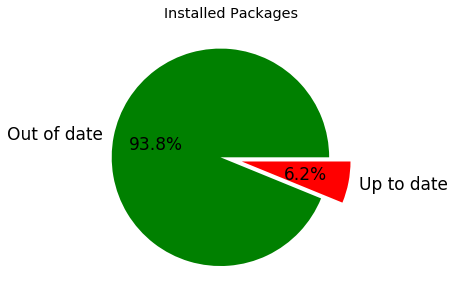

In [45]:
explode = (0.1,0.1)

ax = (tracked_packages
      .groupby('isOutdate')
      .count()
      .plot(kind='pie',
            autopct='%1.1f%%',
            y='package',
            title='Installed Packages',
            colors=['green','red'],
            fontsize=17,
            legend=None,explode=explode)
      )

ax.set_ylabel('')
ax.tick_params(labelsize=30, width=4)
ax.figure.set_size_inches(5,5)
ax.figure.savefig('../../../thesis/Figs/docker/installed_packages.pdf', bbox_inches='tight', facecolor='white')

In [25]:
from fpdf import FPDF
 
pdf = FPDF(orientation='P', unit='mm', format='A4')
pdf.add_page()
pdf.set_font("Arial", size=11)
pdf.cell(300, 10, txt="Welcome to Python!", ln=1, align="left")
pdf.cell(300, 10, txt="Welcome to Python!", ln=1, align="left")
pdf.line(20, 1, 30, 10)
pdf.set_line_width(1)
pdf.set_draw_color(255, 0, 0)
pdf.line(20, 20, 200, 20)
#pdf.output("/home/neglectos/Desktop/simple_demo.pdf")

In [12]:
def change_fonts():
    pdf = FPDF()
    pdf.add_page()
    font_size = 8
    for font in pdf.core_fonts:
        if any([letter for letter in font if letter.isupper()]):
            # skip this font
            continue
        pdf.set_font(font, size=font_size)
        txt = "Font name: {} - {} pts".format(font, font_size)
        pdf.cell(0, 10, txt=txt, ln=1, align="C")
        font_size += 2
 
    pdf.output("/home/neglectos/Desktop/simple_demo.pdf") 
if __name__ == '__main__':
    change_fonts()

In [26]:
bugs2 = bugs.copy()

In [27]:
len(bugs)

2741

['wishlist', 'normal', 'minor', 'important', 'serious', 'grave']

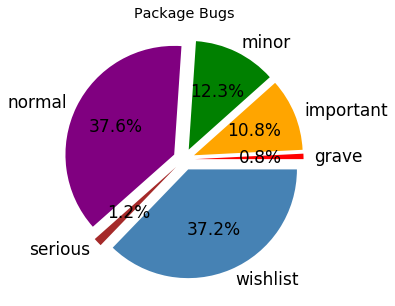

In [44]:
bugs2['severity'] = bugs2['severity'].apply(lambda x: 'grave' if x == "critical"
                                           else x)
order=bugs2.severity.drop_duplicates().values.tolist()
explode = (0.1,0.1,0.1,0.1,0.1,0.1)

ax = (bugs2
      .groupby('severity')
      .count()
      .plot(kind='pie',
            autopct='%1.1f%%',
            y='source',
            colors=['red','orange','green','purple','brown','steelblue'],
            title='Package Bugs',
            fontsize=17,
            legend=None, explode=explode)
      )

ax.set_ylabel('')
ax.tick_params(labelsize=30, width=4)
ax.figure.set_size_inches(5,5)
ax.figure.savefig('../../../thesis/Figs/docker/packages_bugs.pdf', bbox_inches='tight', facecolor='white')

In [38]:
len(vulnerabilities)

212

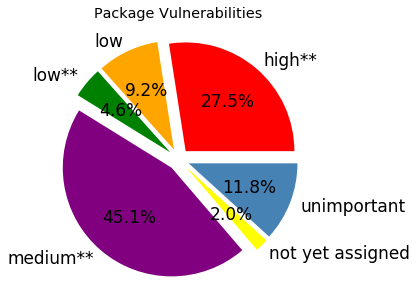

In [43]:
explode = (0.1,0.1,0.1,0.1,0.1,0.1)

ax = (vulnerabilities
      .groupby('urgency')
      .count()
      .plot(kind='pie',
            autopct='%1.1f%%',
            y='source',
            title='Package Vulnerabilities',
            colors=['red','orange','green','purple','yellow','steelblue'],
            fontsize=17,
            legend=None, explode=explode)
      )

ax.set_ylabel('')
ax.tick_params(labelsize=30, width=4)
ax.figure.set_size_inches(5,5)
ax.figure.savefig('../../../thesis/Figs/docker/packages_vuls.pdf', bbox_inches='tight', facecolor='white')